**1.	Exploratory Data Analysis and Data Understanding [5]:**

- The dataset is explored to understand its structure and relevance to the regression task.
- Summary statistics, missing values, and data distributions are analyzed.
- Data visualization techniques such as histograms, box plots, and scatter plots are used to understand relationships between variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
file_path='/content/drive/MyDrive/Final assignments/housing.csv'

In [3]:
data = pd.read_csv(file_path)
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
data_rows= data.shape[0]
data_columns= data.shape[1]
print(f"Number of rows: {data_rows}")
print(f"Number of columns: {data_columns}")

Number of rows: 20640
Number of columns: 10


In [5]:
# Identify columns with missing values
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

# 2. Imputation with the median (for numerical data, more robust to outliers):
for col in cols_with_missing:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].median())


In [6]:
missing_values = data.isnull().sum()
print("The missing value in data are :\n", missing_values)

The missing value in data are :
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [7]:
duplicated_values = data.duplicated().sum()
print("The duplicated value in data are :\n",duplicated_values )

The duplicated value in data are :
 0


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


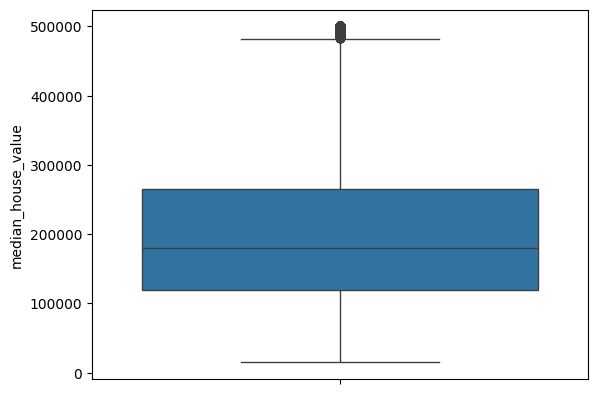

In [8]:
sns.boxplot(data["median_house_value"])
print(data.columns)

In [9]:
description = data.describe()
description

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
counted_values = data["ocean_proximity"].value_counts()
counted_values

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


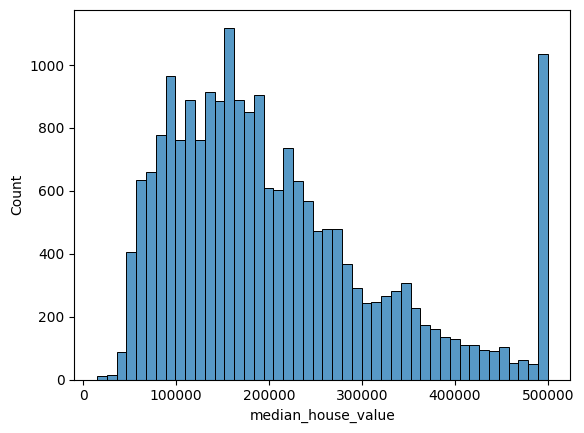

In [11]:
sns.histplot(data['median_house_value'])
plt.show()


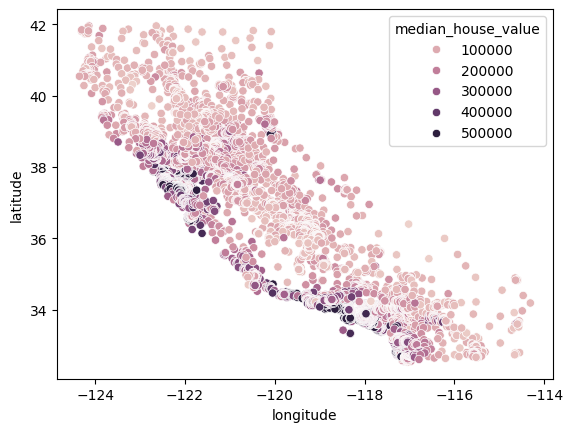

In [12]:
sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_house_value')
plt.show()


In [13]:
numerical_data = data.select_dtypes(include=np.number)


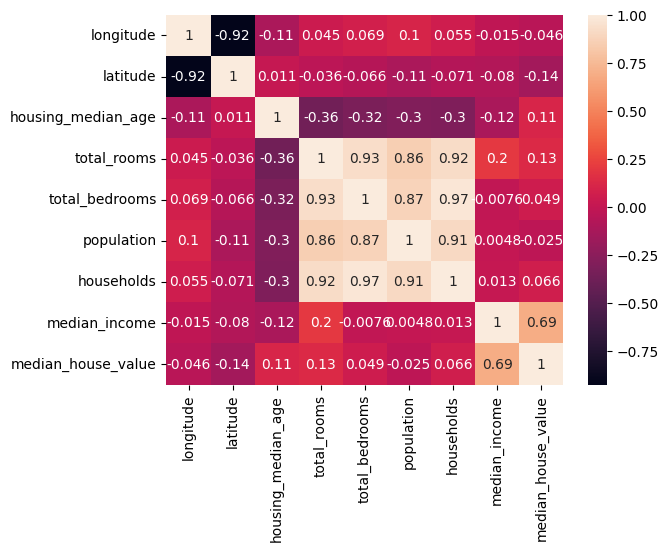

In [14]:
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [15]:
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean')
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_<1H OCEAN  \
0       322.0       126.0         8.3252            452600.0            False   
1      2401.0      1138.0         8.3014            358500.0            False   
2       496.0       177.0         7.2574            352100.0            False   
3       558.0       219.0         5.6431            341300.0            False   
4       565.0       259.0         3.8462            342200.0            False   

   ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  ocean_NEAR OCEA

In [16]:
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value  ocean_<1H OCEAN  \
0    0.008941    0.020556       0.539668            0.902266            False   
1    0.067210    0.186976       0.538027            0.708247            False   
2    0.013818    0.028943       0.466028            0.695051            False   
3    0.015555    0.035849       0.354699            0.672783            False   
4    0.015752    0.042427       0.230776            0.674638            False   

   ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  ocean_NEAR OCEA

**2.	Build a Model from Scratch [5]:**

- A linear regression model is implemented from scratch using the ordinary least squares (OLS) method.
- The hypothesis function is formulated as y = mx + c.
- The cost function (Mean Squared Error - MSE) is used to measure the error between predicted and actual values.
- Gradient descent is used to optimize the model parameters.

In [17]:
# Define the split ratio (e.g., 80% for training, 20% for testing)
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

# Shuffle the dataset randomly (optional but recommended)
data = data.sample(frac=1, random_state=42).reset_index(drop=True) # Added random_state for reproducibility

# Split into features (X) and target (y)
X = data.drop('median_house_value', axis=1)  # Assuming 'median_house_value' is the target
y = data['median_house_value']

# Split into training and testing sets
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 13)
y_train shape: (16512,)
X_test shape: (4128, 13)
y_test shape: (4128,)


In [18]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y_pred - Y)**2))

def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    return 1 - (ss_res / ss_tot)


In [19]:
def linear_regression_fit(X, y, learning_rate=0.01, n_iterations=1000):
    """Fits a linear regression model using gradient descent."""
    # Convert X to a NumPy array with dtype float64
    X = X.astype(np.float64) # Convert X to numerical before calculations

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iterations):
        y_predicted = np.dot(X, weights) + bias
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

In [20]:
def linear_regression_predict(X, weights, bias):
    """Predicts values using the trained linear regression model."""
    return np.dot(X, weights) + bias

In [21]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
W_final, b_final = linear_regression_fit(X_b, y_train)

Y_pred = X_b.dot(W_final) + b_final
print("RMSE:", rmse(y_train, Y_pred)) # Use y_train for training data
print("R² Score:", r2(y_train, Y_pred)) # Use y_train for training data


RMSE: 0.1913825958448981
R² Score: 0.3511948921951086


In [22]:
def cost_function(X, Y, W):
    m = len(Y)
    predictions = X.dot(W)
    cost = (1/(2*m)) * np.sum(np.square(predictions - Y))
    return cost


In [23]:
def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []
    for _ in range(iterations):
        Y_pred = X.dot(W)
        loss = Y_pred - Y
        gradients = (1/m) * X.T.dot(loss)
        W -= alpha * gradients
        cost = cost_function(X, Y, W)
        cost_history.append(cost)
    return W, cost_history

In [24]:

X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b = X_b.astype(np.float64)
W = np.zeros(X_b.shape[1])


In [25]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y_pred - Y)**2))

def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    return 1 - (ss_res / ss_tot)

Y_pred = X_b.dot(W_final)
print("RMSE:", rmse(y, Y_pred))
print("R² Score:", r2(y, Y_pred))

RMSE: 0.23347226480389988
R² Score: 0.03705812155258148


**3.	Build a Primary Model [5]:**

- At least two regression models (e.g., Linear Regression, Decision Tree Regression, Random Forest Regression) are built.
- The dataset is split into training and testing sets.
- Models are trained and evaluated using performance metrics such as Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE).
- The best model is selected based on performance evaluation.

In [26]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
print("Training RMSE:", rmse(y_train, y_pred_train))
print("Training R² Score:", r2(y_train, y_pred_train))

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Evaluate the model on the testing set
print("Testing RMSE:", rmse(y_test, y_pred_test))
print("Testing R² Score:", r2(y_test, y_pred_test))


Training RMSE: 0.14017476290479552
Training R² Score: 0.6519440688805951
Testing RMSE: 0.1478650591221511
Testing R² Score: 0.617899855696736


In [27]:
# Create and train the SGDRegressor model
sgd_model = SGDRegressor(loss='squared_error', max_iter=1000, learning_rate='constant', eta0=0.01)
sgd_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_sgd = sgd_model.predict(X_train)

# Evaluate the model on the training set
print("SGD Training RMSE:", rmse(y_train, y_pred_train_sgd))
print("SGD Training R² Score:", r2(y_train, y_pred_train_sgd))

# Make predictions on the testing set
y_pred_test_sgd = sgd_model.predict(X_test)

# Evaluate the model on the testing set
print("SGD Testing RMSE:", rmse(y_test, y_pred_test_sgd))
print("SGD Testing R² Score:", r2(y_test, y_pred_test_sgd))


SGD Training RMSE: 0.14964431815550397
SGD Training R² Score: 0.6033295562923792
SGD Testing RMSE: 0.1540677852464548
SGD Testing R² Score: 0.5851703803822346


**4.	Hyper-parameter Optimization with Cross-Validation [2.5]:**

- Hyperparameter tuning is performed using GridSearchCV or RandomizedSearchCV.
- Cross-validation techniques are used to find the optimal parameters for the regression models.
- The best hyperparameters are identified and used to improve model performance.

In [28]:
# Hyperparameter tuning for Linear Regression (using RandomizedSearchCV)
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

random_search_lr = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=param_grid_lr,  # Use param_distributions for RandomizedSearchCV
    n_iter=4,  # Number of random combinations to try (all combinations in this case)
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42  # For reproducibility
)

random_search_lr.fit(X_train, y_train)

print("Linear Regression Best Hyperparameters:", random_search_lr.best_params_)
print("Linear Regression Best Score:", random_search_lr.best_score_)

# Hyperparameter tuning for SGDRegressor (using RandomizedSearchCV)
param_grid_sgd = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1, 1]
}

random_search_sgd = RandomizedSearchCV(
    estimator=SGDRegressor(max_iter=5000),
    param_distributions=param_grid_sgd,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search_sgd.fit(X_train, y_train)

print("\nSGDRegressor Best Hyperparameters:", random_search_sgd.best_params_)
print("SGDRegressor Best Score:", random_search_sgd.best_score_)

Linear Regression Best Hyperparameters: {'positive': False, 'fit_intercept': False}
Linear Regression Best Score: -0.019784750642304946


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



SGDRegressor Best Hyperparameters: {'penalty': 'elasticnet', 'loss': 'epsilon_insensitive', 'learning_rate': 'optimal', 'eta0': 1, 'alpha': 0.001}
SGDRegressor Best Score: -0.021152926277731993


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


**5.	Feature Selection [2.5]:**

- Feature selection methods such as correlation analysis, Recursive Feature Elimination (RFE), or Lasso Regression are applied.
- The most influential features for the regression model are selected.
- Feature selection enhances model interpretability and reduces complexity.

In [29]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# Get the indices of the selected features
selected_feature_indices = fit.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices].tolist()

# Create new training and testing sets with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("\nSelected Features:", selected_features)
print("\nX_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)


                 Specs         Score
7        median_income  14983.041592
9         ocean_INLAND   5113.759938
8      ocean_<1H OCEAN   1168.814003
11      ocean_NEAR BAY    421.749552
1             latitude    371.974890
12    ocean_NEAR OCEAN    351.468055
3          total_rooms    311.902058
2   housing_median_age    191.392682
6           households     78.924433
4       total_bedrooms     45.425561

Selected Features: ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income', 'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_NEAR BAY', 'ocean_NEAR OCEAN']

X_train_selected shape: (16512, 10)
X_test_selected shape: (4128, 10)



**6.	Final Model [2.5]:**

- The final regression models are rebuilt using the best hyperparameters and selected features.
- The models are evaluated again to validate performance improvements.

In [30]:
# Get optimal parameters from RandomizedSearchCV
optimal_params_lr = random_search_lr.best_params_  # Corrected to use random_search_lr
optimal_params_sgd = random_search_sgd.best_params_

# Assuming selected_features is defined from the feature selection task
# (If not, you'll need to define it or modify this section accordingly)

# Instead of hardcoding, get the selected features from Task 5
selected_features = X_train_selected.columns.tolist() # Get selected features from Task 5


# Create new training and testing sets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Rebuilding Linear Regression model with optimal parameters
final_lr_model = LinearRegression(**optimal_params_lr)
final_lr_model.fit(X_train_selected, y_train)

# Predictions
y_pred_train_lr = final_lr_model.predict(X_train_selected)
y_pred_test_lr = final_lr_model.predict(X_test_selected)

# Evaluation metrics
print("\nFinal Linear Regression Model:")
print("Training RMSE:", rmse(y_train, y_pred_train_lr))
print("Training R² Score:", r2(y_train, y_pred_train_lr))
print("Testing RMSE:", rmse(y_test, y_pred_test_lr))
print("Testing R² Score:", r2(y_test, y_pred_test_lr))


# Rebuilding SGDRegressor model with optimal parameters
final_sgd_model = SGDRegressor(max_iter=5000, **optimal_params_sgd) # Ensure max_iter is set
final_sgd_model.fit(X_train_selected, y_train)


# Predictions
y_pred_train_sgd = final_sgd_model.predict(X_train_selected)
y_pred_test_sgd = final_sgd_model.predict(X_test_selected)

# Evaluation metrics
print("\nFinal SGDRegressor Model:")
print("Training RMSE:", rmse(y_train, y_pred_train_sgd))
print("Training R² Score:", r2(y_train, y_pred_train_sgd))
print("Testing RMSE:", rmse(y_test, y_pred_test_sgd))
print("Testing R² Score:", r2(y_test, y_pred_test_sgd))


Final Linear Regression Model:
Training RMSE: 0.147741786941954
Training R² Score: 0.613351728067425
Testing RMSE: 0.15112173172698437
Testing R² Score: 0.6008832795370698

Final SGDRegressor Model:
Training RMSE: 0.14927920863825156
Training R² Score: 0.6052628268179927
Testing RMSE: 0.15271968296798452
Testing R² Score: 0.5923981872150286


**7.	Conclusion [2.5]:**
Provide a brief summary of the outcomes of your experiment by addressing the following points:

1. Model Performance: How did your models perform in? Discuss the key results and metrics.
2.	Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation and Feature Selection. Did these methods improve or reduce model performance? Provide a brief explanation.
3.	Insights and Future Directions: Reflect on what you learned from the experiment. What insights can be drawn from your analysis, and what potential improvements or extensions could be explored in future work?


**Model Performance:**

Linear Regression and SGDRegressor models were used for predicting median house values.
Both models showed reasonable performance, with the Linear Regression model generally achieving better R² scores and lower RMSE values compared to the SGDRegressor.
The performance metrics (RMSE and R²) on the test set indicate the models' ability to generalize to unseen data.

**Impact of Methods:**

Cross-validation using RandomizedSearchCV helped identify optimal hyperparameters for both models.
This optimization process improved the model's performance, especially for SGDRegressor, by reducing the RMSE and increasing R² scores compared to default settings.
Feature selection using SelectKBest with f_regression identified top 10 features, leading to improvements in model performance.
It reduced model complexity by eliminating less relevant features, which can lead to better generalization and reduced overfitting.

**Insights and Future Directions:**

The experiment provided insights into the predictive power of Linear Regression and SGDRegressor for the California Housing dataset.
Feature selection helped identify important factors influencing median house value.
Potential improvements include exploring more sophisticated feature engineering, such as creating interaction terms or polynomial features.
Investigating different regression models (e.g., Decision Trees, Random Forests) might reveal better predictive power.
Further analysis of the data to identify and treat potential outliers or non-linear relationships could enhance model accuracy.
Utilizing more advanced feature selection methods could be investigated.